In [1]:
#Import Required Pacakges
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import pickle

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# load Corpus Dataframe
#Open Corpus of News Article Text
with open('../news_articles_processing/data_frames/bitcoin_news_df_processed_for_modeling.pickle', 'rb') as file:
     bitcoin_news_df = pickle.load(file)

In [ ]:
#Create Sentiment Dataframe and Add Dates and Sentences with Numbers Column from bitcoin dataframe
sentiment_df_with_num = pd.DataFrame(columns=['date','article','article_polarity_neg_pos','article_subjectivity'])

sentiment_df_without_num = pd.DataFrame(columns=['date','article','article_polarity_neg_pos','article_subjectivity'])

#Assign Date and Sent With Number Values
sentiment_df_with_num.date = bitcoin_news_df['date']
sentiment_df_without_num .date = bitcoin_news_df['date']

sentiment_df_with_num.article = bitcoin_news_df['sent_with_num']
sentiment_df_without_num.article = bitcoin_news_df['text']

#Join sentences with number into single paragraph
sentiment_df_with_num.article = sentiment_df_with_num.article.apply(lambda x: ' '.join(x))

In [ ]:
#Remove All Rows That Don't Have Date and Text and Reset Index
sentiment_df_with_num = sentiment_df_with_num[sentiment_df_with_num['article'] != '']
sentiment_df_with_num = sentiment_df_with_num.reset_index(drop=True)


sentiment_df_without_num = sentiment_df_without_num[sentiment_df_without_num['article'] != '']
sentiment_df_without_num = sentiment_df_without_num.reset_index(drop=True)

In [ ]:
#Split data frame to previous 2.5 years only January 2017 - June 2019
sentiment_df_with_num_2_5_years = sentiment_df_with_num[sentiment_df_with_num.date > '2017-01-01 00:00:00']
sentiment_df_without_num_2_5_years = sentiment_df_without_num[sentiment_df_without_num.date > '2017-01-01 00:00:00']

In [ ]:
#Define Sentiment Function
def sentiment_parser(corpus):
    total_sentiment = []
    for line in corpus:
        line_sent=TextBlob(line).sentiment.polarity
        total_sentiment.append(line_sent)
    return total_sentiment

In [ ]:
#Define Subjectivity Function
def subjectivity_parser(corpus):
    total_sentiment = []
    for line in corpus:
        line_sent=TextBlob(line).sentiment.subjectivity
        total_sentiment.append(line_sent)
    return total_sentiment

In [ ]:
#Calculate Sentiment of Articles with Numbers
sentiment_articles_with_num = sentiment_parser(sentiment_df_with_num_2_5_years.article)

#Calculate Polarity of Articles with Numbers
subjectivity_articles_with_num = subjectivity_parser(sentiment_df_with_num_2_5_years.article)

In [ ]:
#Calculate Sentiment of Articles with Numbers
sentiment_articles_without_num = sentiment_parser(sentiment_df_without_num_2_5_years.article)

#Calculate Polarity of Articles with Numbers
subjectivity_articles_without_num = subjectivity_parser(sentiment_df_without_num_2_5_years.article)

In [ ]:
#Fill 2.5 Year Dataframe Sentiment and Subjectivity Columns with values calculated above
sentiment_df_with_num_2_5_years.article_polarity_neg_pos = sentiment_articles_with_num
sentiment_df_with_num_2_5_years.article_subjectivity = subjectivity_articles_with_num

sentiment_df_without_num_2_5_years.article_polarity_neg_pos = sentiment_articles_without_num
sentiment_df_without_num_2_5_years.article_subjectivity = subjectivity_articles_without_num

In [ ]:
#In order to calculate the average sentiment and subjectivity across a day, will remove timestamps and keep date columns in 
#date only form 
sentiment_df_with_num_2_5_years.date = pd.to_datetime(sentiment_df_with_num_2_5_years['date']).dt.date
sentiment_df_without_num_2_5_years.date = pd.to_datetime(sentiment_df_without_num_2_5_years['date']).dt.date

In [ ]:
#Check Work
sentiment_df_with_num_2_5_years.head(3)

In [ ]:
#Calculate Mean Sentiment and Subjectivty Across Days
mean_sentiment_subjectivity_across_days_with_num = sentiment_df_with_num_2_5_years.groupby(['date']).mean()
mean_sentiment_subjectivity_across_days_without_num = sentiment_df_without_num_2_5_years.groupby(['date']).mean()

In [ ]:
#Save Dataframes
with open('./data_frames/mean_sent_subj_across_days_2_5_years_with_num.pickle', 'wb') as file:
     pickle.dump(mean_sentiment_subjectivity_across_days_with_num, file)
        
with open('./data_frames/mean_sent_subj_across_days_2_5_years_without_num.pickle', 'wb') as file:
     pickle.dump(mean_sentiment_subjectivity_across_days_without_num, file)

In [37]:
#load Dataframes
with open('./data_frames/mean_sent_subj_across_days_2_5_years_with_num.pickle', 'rb') as file:
     mean_sentiment_subjectivity_across_days_with_num= pickle.load(file)
        
with open('./data_frames/mean_sent_subj_across_days_2_5_years_without_num.pickle', 'rb') as file:
     mean_sentiment_subjectivity_across_days_without_num = pickle.load(file)

In [8]:
def graph_sentiment(sentiment_data, file_name, type_of_analysis=None):
    """
    This function plots a graph of bitcoin news article sentiment or subjectivity averages across days of week for last 2.5 years
    sentiment_data : Sentiment Data Average Across Last 2.5 Years
    file_name: Name of file that image of graph will be saved as
    type_of_analysis: sentiment or subjectivity
    """
    fig, ax = plt.subplots(figsize=(20, 15));
    plt.figure(dpi=600);

    x_axis = [x for x in range(len(sentiment_data))]
    if type_of_analysis=="Sentiment":
        ax.set_ylabel('Sentiment Rating -1.0-1.0', fontsize=20)
    else:
        ax.set_ylabel('Subjectivity Rating 0.0-1.0', fontsize=20)
        
    ax.set_xlabel('Day', fontsize=20)
    ax.set_title ('Average '+ type_of_analysis +' Across Day of Week of Bitcoin News Articles From 01-01-2017 to 06-01-2019', fontsize=20)
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(16) 
    for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(16) 
    ax.plot(x_axis,sentiment_data);
    
    fig.tight_layout()
    
    fig.savefig('./graphs/'+file_name+'.png', dpi=600)
    return ax

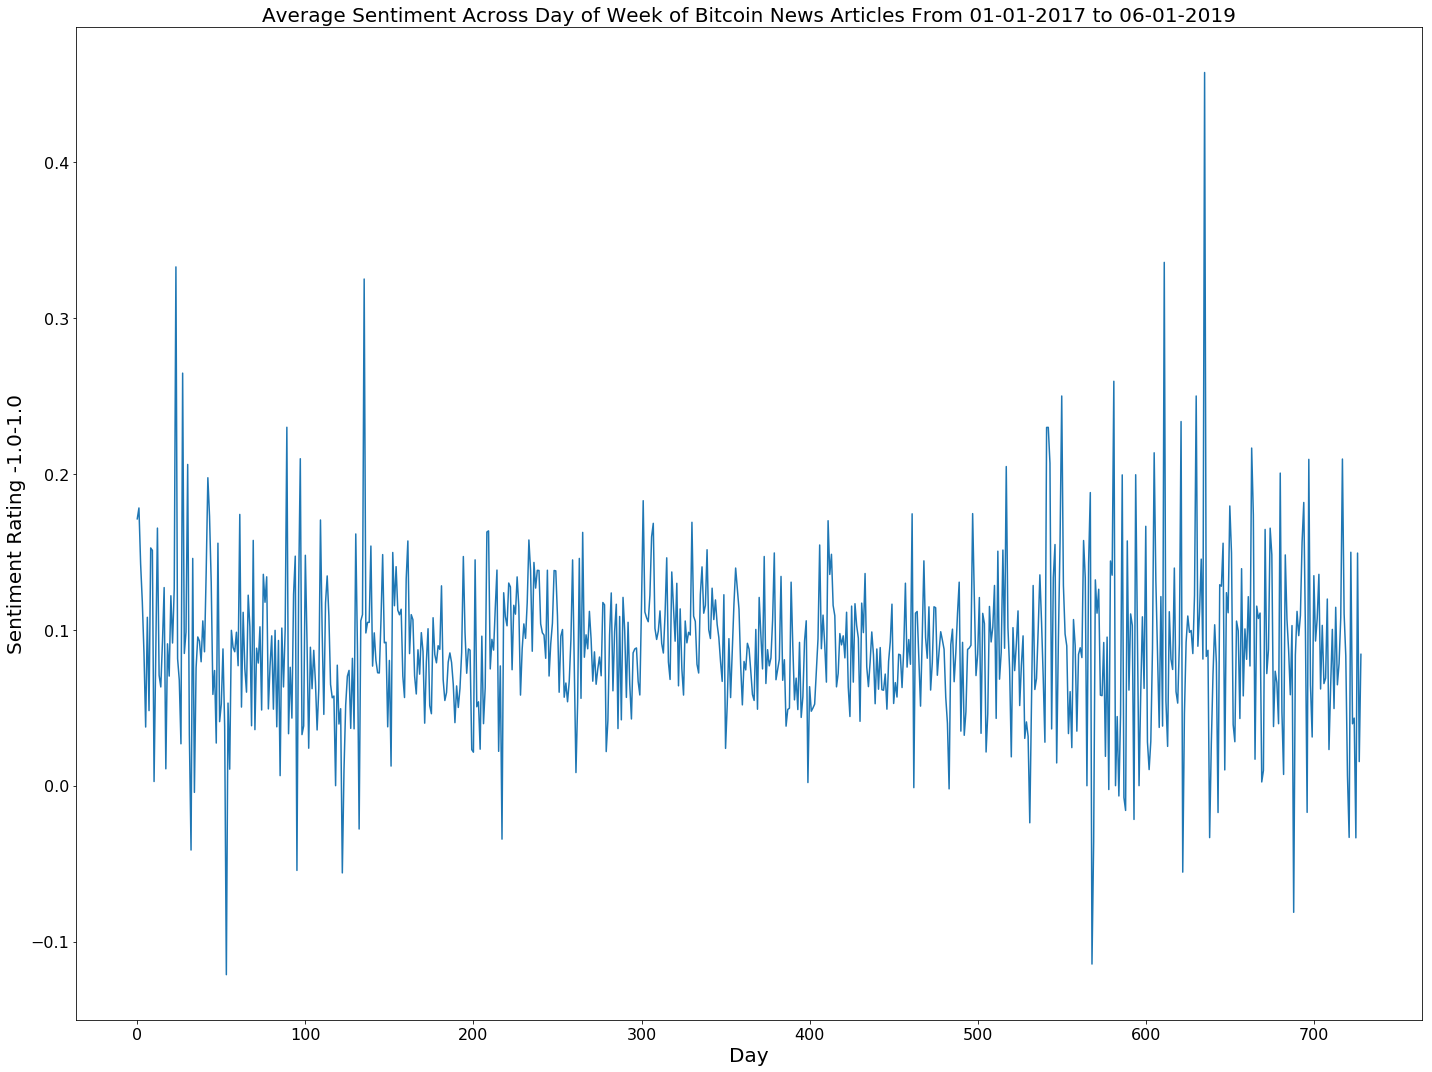

<Figure size 3600x2400 with 0 Axes>

In [9]:
#Mean sentiment graph across days of week of article sentences with numbers
graph_sentiment(mean_sentiment_subjectivity_across_days_with_num['article_polarity_neg_pos'],\
                'average_sentiment_articles_2_5_years_with_num', 'Sentiment')

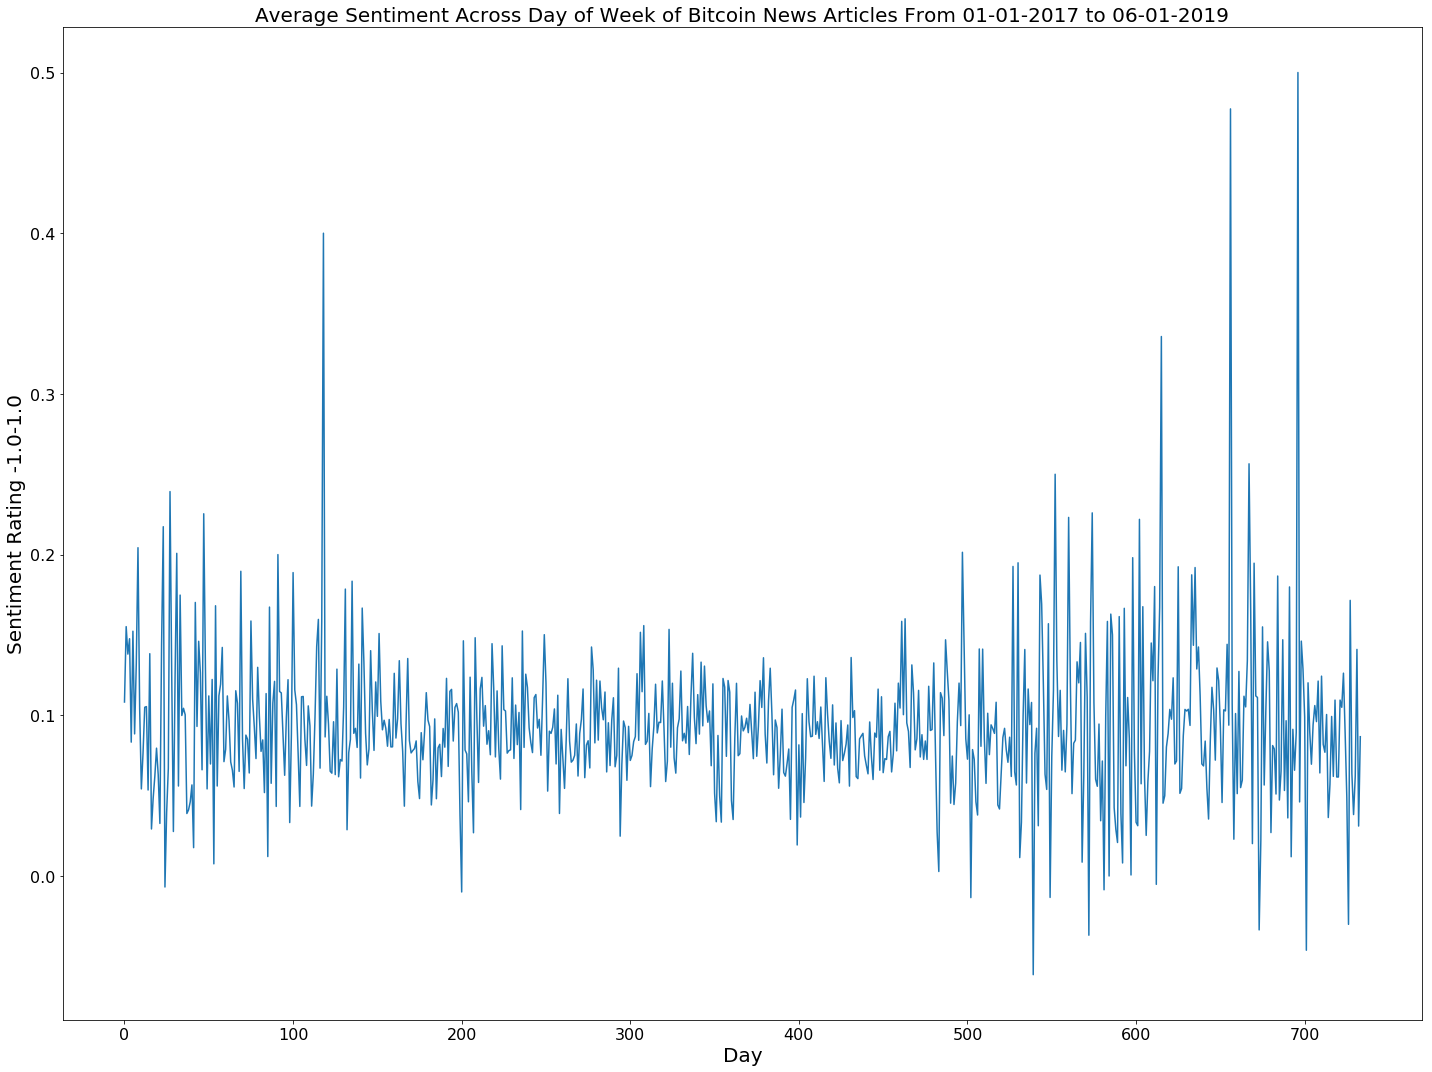

<Figure size 3600x2400 with 0 Axes>

In [10]:
#Mean sentiment graph across days of week of articles without numbers
graph_sentiment(mean_sentiment_subjectivity_across_days_without_num['article_polarity_neg_pos'],\
                'average_sentiment_articles_2_5_years_without_num', 'Sentiment')

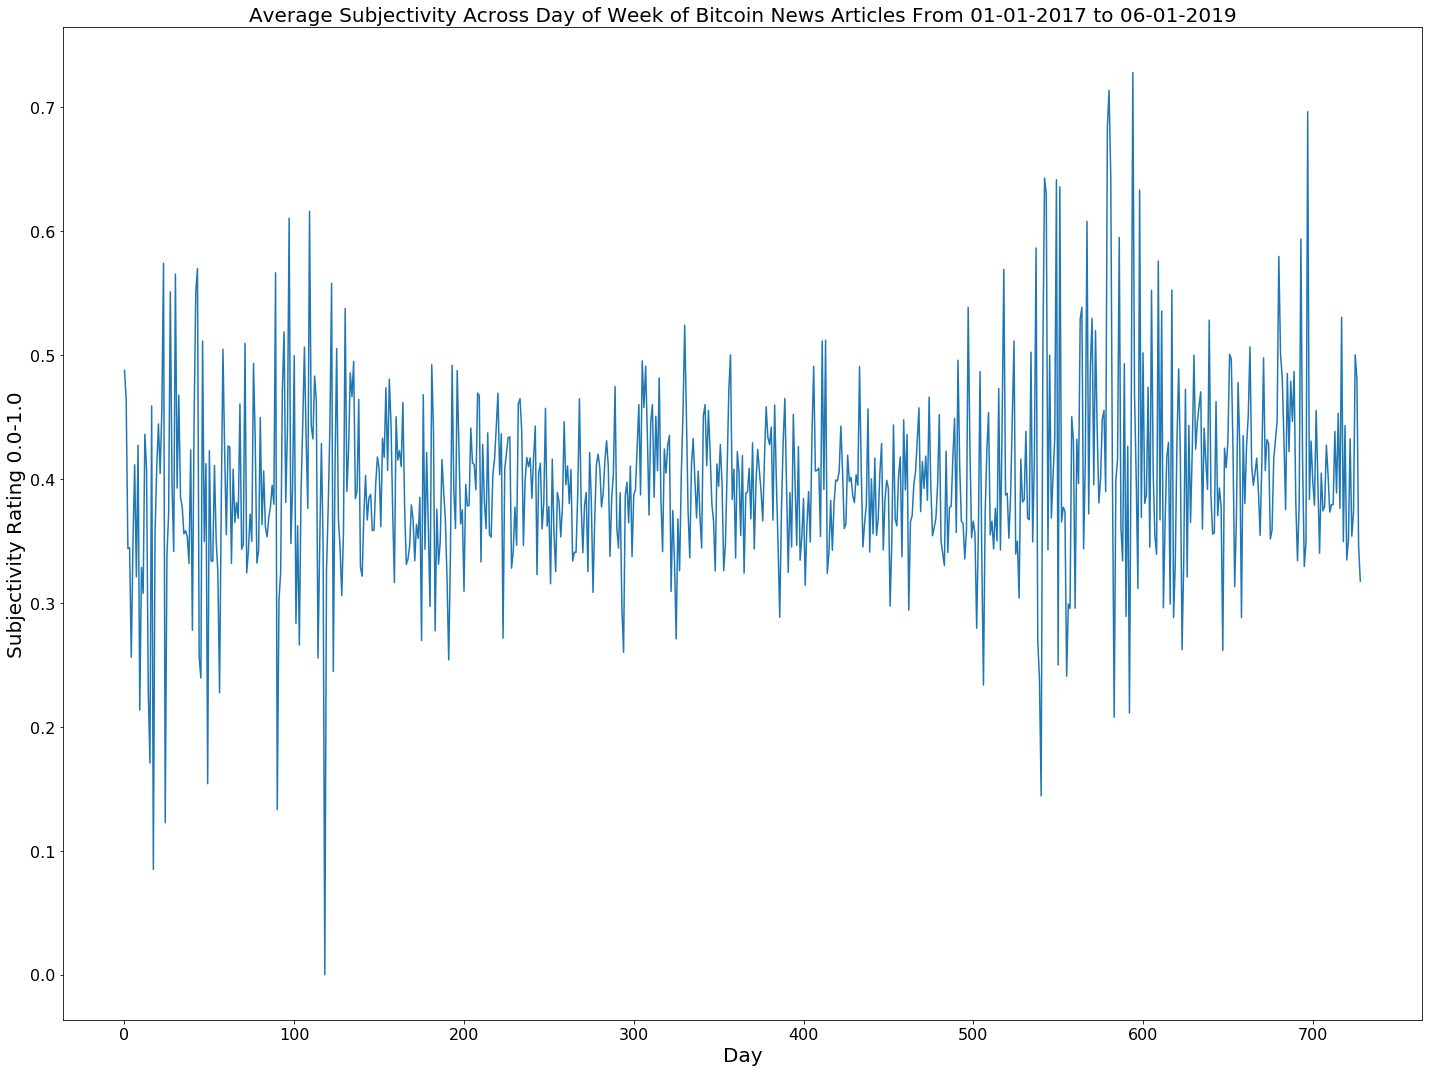

<Figure size 3600x2400 with 0 Axes>

In [11]:
#Mean sentiment graph across days of week of article sentences with numbers
graph_sentiment(mean_sentiment_subjectivity_across_days_with_num['article_subjectivity'],\
                'average_article_subjectivity_articles_2_5_years_with_num', 'Subjectivity')

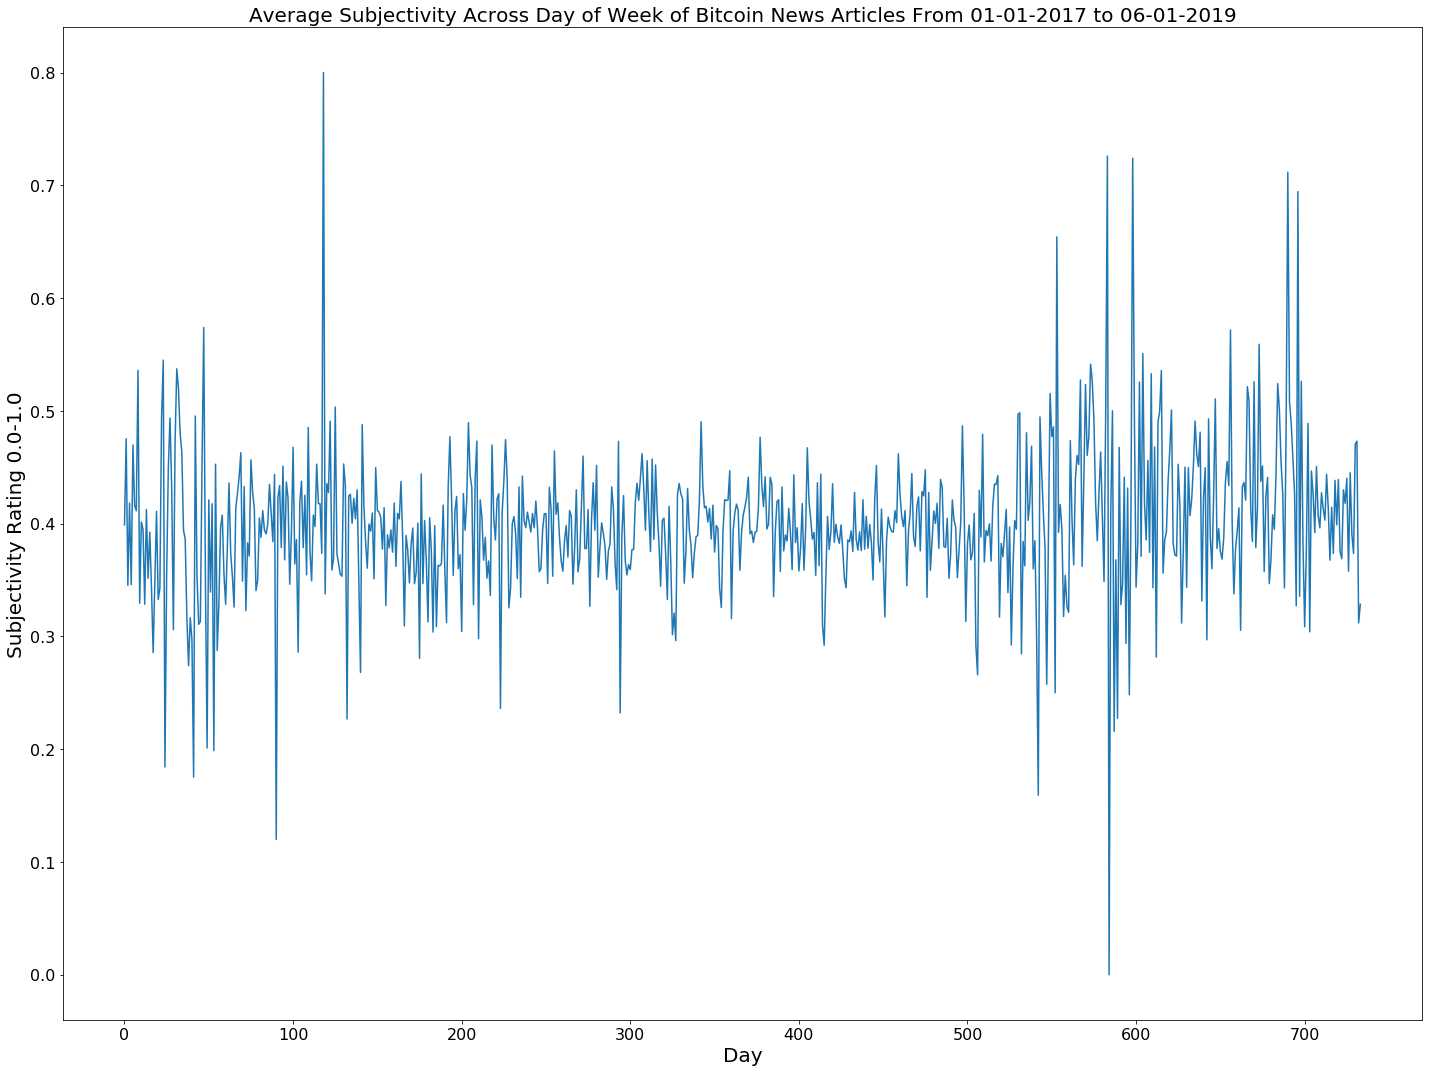

<Figure size 3600x2400 with 0 Axes>

In [12]:
#Mean sentiment graph across days of week of article sentences without numbers
graph_sentiment(mean_sentiment_subjectivity_across_days_without_num['article_subjectivity'],\
                'average_article_subjectivity_articles_2_5_years_without_num', 'Subjectivity')

### Figure out how sentiment changes during major percent changes in bitcoins history during the past 2.5 years

In [13]:
with open('../crypto_currency_and_market_value_history/data/largest_positive_change_bins_values_and_dates.pickle', 'rb') as file:
     largest_positive_change_bins_values_and_dates = pickle.load(file)

with open('../crypto_currency_and_market_value_history/data/largest_negative_change_bins_values_and_dates.pickle', 'rb') as file:
     largest_negative_change_bins_values_and_dates = pickle.load(file)

In [28]:
largest_positive_change_bins_values_and_dates[0:5]

[[5.831348486442067, datetime.date(2017, 1, 17)],
 [3.203740495380858, datetime.date(2017, 2, 1)],
 [4.086591509511295, datetime.date(2017, 2, 21)],
 [4.792425375315124, datetime.date(2017, 3, 21)],
 [4.3808302807793575, datetime.date(2017, 3, 28)]]

In [29]:
largest_negative_change_bins_values_and_dates[0:5]

[[-10.472062771456002, datetime.date(2017, 1, 6)],
 [-4.4073759345998, datetime.date(2017, 2, 10)],
 [-1.4750726823954952, datetime.date(2017, 2, 25)],
 [-8.491664752682503, datetime.date(2017, 3, 18)],
 [-6.380821066303, datetime.date(2017, 3, 25)]]

In [38]:
#Reset Column Index of Sentiment and Subjectivity Dataframes
mean_sentiment_subjectivity_across_days_with_num.reset_index(inplace=True)
mean_sentiment_subjectivity_across_days_without_num.reset_index(inplace=True)

In [118]:
#Store article sentiment of previous and post positive changes
def article_loc_of_lrg_coin_price_diff(df_changes,df_sentiment):
    """
    df_changes: Dataframe of largest postiive/negative changes across bitcoin prices
    df_sentiment: Dataframe of article sentiment calculations
    """
    sentiment_prev_post_postive_price_change = []

    for i in df_changes:
        location = df_sentiment.loc[df_sentiment.date == i[1]]
        
        if len(location) == 1:
            index = location.index[0]
            index_range = range(index-3,index+4)
            sentiment_prev_post_postive_price_change.append(index_range)
        else:
            pass
    
    return sentiment_prev_post_postive_price_change


sentiment_indexs_largest_postive_change = article_loc_of_lrg_coin_price_diff(largest_positive_change_bins_values_and_dates,\
                                                                             mean_sentiment_subjectivity_across_days_with_num)


sentiment_indexs_largest_negative_change = article_loc_of_lrg_coin_price_diff(largest_negative_change_bins_values_and_dates,\
                                                                             mean_sentiment_subjectivity_across_days_with_num)

In [149]:
#Open average daily bitcoin price dataframe
with open('../crypto_currency_and_market_value_history/data/average_daily_bitcoin_price_2_5_years.pickle', 'rb') as file:
     average_daily_bitcoin_price_2_5_years = pickle.load(file)

In [215]:
test_2 = average_daily_bitcoin_price_2_5_years.loc[mean_sentiment_subjectivity_across_days_with_num.loc[sentiment_indexs_largest_postive_change[0]]['date'].index[:]]['weighted price']

In [216]:
test_2

13    826.898750
14    816.944167
15    827.974583
16    876.256667
17    884.895000
18    893.527083
19    895.244167
Name: weighted price, dtype: float64

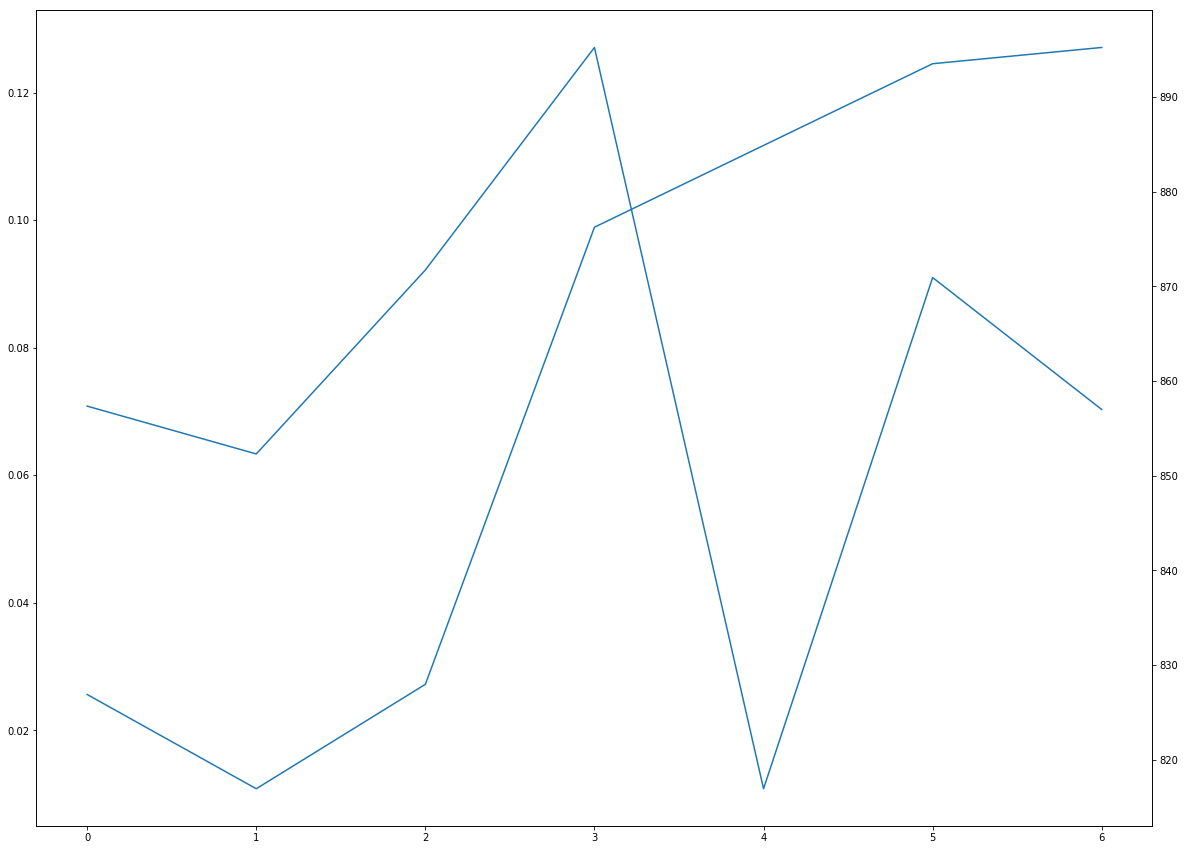

<Figure size 3600x2400 with 0 Axes>

In [219]:
fig, ax1 = plt.subplots(figsize=(20, 15));
color = 'tab:red'

plt.figure(dpi=600);

test = mean_sentiment_subjectivity_across_days_with_num.iloc[sentiment_indexs_largest_postive_change[0]]['article_polarity_neg_pos']

x_axis = [x for x in range(len(test))]
ax1.set_xlabel('Day')
ax1.set_ylabel('sentiment -1.0-1.0', color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax1.plot(x_axis,test)

ax2 = ax1.twinx()

ax2.plot(x_axis,test_2)

In [133]:
print(mean_sentiment_subjectivity_across_days_with_num.iloc[sentiment_indexs_largest_postive_change[0]]['date'])

13    2017-01-14
14    2017-01-15
15    2017-01-16
16    2017-01-17
17    2017-01-18
18    2017-01-19
19    2017-01-20
Name: date, dtype: object


In [ ]:
for indexs in sentiment_indexs_largest_postive_change:
    print(mean_sentiment_subjectivity_across_days_with_num.iloc[sentiment_indexs_largest_postive_change[0]]['article_polarity_neg_pos'])

In [ ]:
def graph_sentiment(sentiment_data, file_name, type_of_analysis=None):
    """
    This function plots a graph of bitcoin news article sentiment or subjectivity averages across days of week for last 2.5 years
    sentiment_data : Sentiment Data Average Across Last 2.5 Years
    file_name: Name of file that image of graph will be saved as
    type_of_analysis: sentiment or subjectivity
    """
    fig, ax = plt.subplots(figsize=(20, 15));
    plt.figure(dpi=600);

    x_axis = [x for x in range(len(sentiment_data))]
    if type_of_analysis=="Sentiment":
        ax.set_ylabel('Sentiment Rating -1.0-1.0', fontsize=20)
    else:
        ax.set_ylabel('Subjectivity Rating 0.0-1.0', fontsize=20)
        
    ax.set_xlabel('Day', fontsize=20)
    ax.set_title ('Average '+ type_of_analysis +' Across Day of Week of Bitcoin News Articles From 01-01-2017 to 06-01-2019', fontsize=20)
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(16) 
    for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(16) 
    ax.plot(x_axis,sentiment_data);
    
    fig.tight_layout()
    
    fig.savefig('./graphs/'+file_name+'.png', dpi=600)
    return ax